In [2]:
import numpy as np
import matplotlib.pyplot as plt
import csv
import pandas as pd
import os
import tensorflow as tf
import sys
import seaborn as sns

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_row', 100)

In [3]:
## 파일 경로 확인
## os.를 이용하여 순차적으로 불러오기 
folder_dir = './Data/Raw_Data'
file_list = os.listdir(folder_dir)
file_list.sort()

In [4]:
#file_list
data = []
temp_ = []
shapeform = 0
for i,_folder_dir in enumerate (file_list):
    path = (folder_dir+'/'+_folder_dir)
    temp = []
    with open(path, 'r') as file:
        reader = csv.reader(file, delimiter='|')
        for checker, tmp in enumerate (reader):
            if checker == 0:
                continue
            else:
                tmp = np.float64(tmp)
                temp.append(tmp)
                
    temp = np.array(temp)
    tmp = len(temp)
    shapeform += int(tmp)
    temp = np.ravel(temp)
    #for j, val1 in enumerate (temp):
    #    val2 = np.isnan(val1)
    #    if val2 == True:
    #        temp[j] = 0
    #    else:
    #        continue
    temp_.extend(temp)
    
data = np.array(temp_)
my_data = np.reshape(data,(shapeform,41))       
print(my_data.shape)

(1552210, 41)


In [5]:
#file_list
data = []
for i,_folder_dir in enumerate (file_list):
    path = (folder_dir+'/'+_folder_dir)

    temp = []
    with open(path, 'r') as file:
        reader = csv.reader(file, delimiter='|')
        for checker, tmp in enumerate (reader):
            if checker == 0:
                continue
            else:
                tmp = np.float64(tmp)
                temp.append(tmp)
                
    temp = np.array(temp)
    #print(temp.shape)
    ## 마지막 40번째 Factor는 Sepsis Label
    #temp_ = np.concatenate((temp[:,0], temp[:,1], temp[:,2], temp[:,3], temp[:,4], temp[:,5], temp[:,6], temp[:,8], temp[:,9],
    #                        temp[:,10], temp[:,12], temp[:,15], temp[:,17], temp[:,18], 
    #                        temp[:,19], temp[:,21], temp[:,23], temp[:,24], temp[:,25], 
    #                        temp[:,31], temp[:,34], temp[:,40]), axis=0)
    
    #temp_ = np.concatenate((temp[:,0], temp[:,1], temp[:,2], temp[:,3], temp[:,4], temp[:,5], temp[:,6],
    #                        temp[:,10], temp[:,12], temp[:,15], temp[:,17], 
    #                        temp[:,19], temp[:,21], temp[:,23], temp[:,25], 
    #                        temp[:,31], temp[:,34], temp[:,40]), axis=0)
    
    temp_ = np.concatenate((temp[:,0], temp[:,1], temp[:,2], temp[:,3], temp[:,4], temp[:,5], temp[:,6],
                        temp[:,8], temp[:,9], temp[:,10], temp[:,11], temp[:,12], temp[:,15], 
                        temp[:,17], temp[:,18], temp[:,19], temp[:,21], temp[:,23], temp[:,24]
                           , temp[:,25], temp[:,28], temp[:,29], temp[:,31], temp[:,33], temp[:,34]
                           , temp[:,35], temp[:,36], temp[:,37], temp[:,38], temp[:,39], temp[:,40]), axis=0)
    
    
    #temp_ = np.reshape(temp_,(temp.shape[0],22), order='F')
    temp_ = np.reshape(temp_,(temp.shape[0],31), order='F')
    
    for j,val1 in enumerate (temp_):
        for k,val2 in enumerate (val1):
            ## np.isnan 은 Nan을 찾으면 True를 리턴
            val3 = np.isnan(val2)
            if val3 == True:
                temp_[j,k] = 0
            else:
                continue
        data.append(temp_[j])
        
data = np.array(data)
print('Data_Shape:',data.shape)
        
#np.save('C:/jupyter/Human_Deep/Data/Numpy_Data/Total_Data', data)

Data_Shape: (1552210, 31)


In [6]:
cut_data = data[:300]

In [28]:
cut_data.shape

(300, 31)

In [8]:
pd_cut_data = pd.DataFrame(cut_data)

In [9]:
pd_data = pd.DataFrame(data)

In [10]:
pd_data.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30
0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,83.14,0.0,0.0,0.0,-0.03,1.0,0.0
1,97.0,95.0,0.00,98.0,75.33,0.0,19.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,83.14,0.0,0.0,0.0,-0.03,2.0,0.0
2,89.0,99.0,0.00,122.0,86.00,0.0,22.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,83.14,0.0,0.0,0.0,-0.03,3.0,0.0
3,90.0,95.0,0.00,0.0,0.00,0.0,30.0,24.0,0.0,0.00,7.36,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,83.14,0.0,0.0,0.0,-0.03,4.0,0.0
4,103.0,88.5,0.00,122.0,91.33,0.0,24.5,0.0,0.0,0.28,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,83.14,0.0,0.0,0.0,-0.03,5.0,0.0
5,110.0,91.0,0.00,0.0,0.00,0.0,22.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,83.14,0.0,0.0,0.0,-0.03,6.0,0.0
6,108.0,92.0,36.11,123.0,77.00,0.0,29.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,83.14,0.0,0.0,0.0,-0.03,7.0,0.0
7,106.0,90.5,0.00,93.0,76.33,0.0,29.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,83.14,0.0,0.0,0.0,-0.03,8.0,0.0
8,104.0,95.0,0.00,133.0,88.33,0.0,26.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,83.14,0.0,0.0,0.0,-0.03,9.0,0.0
9,102.0,91.0,0.00,134.0,87.33,0.0,30.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,83.14,0.0,0.0,0.0,-0.03,10.0,0.0


In [11]:
pd_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30
0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,83.14,0.0,0.0,0.0,-0.03,1.0,0.0
1,97.0,95.0,0.0,98.0,75.33,0.0,19.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,83.14,0.0,0.0,0.0,-0.03,2.0,0.0
2,89.0,99.0,0.0,122.0,86.00,0.0,22.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,83.14,0.0,0.0,0.0,-0.03,3.0,0.0
3,90.0,95.0,0.0,0.0,0.00,0.0,30.0,24.0,0.0,0.00,7.36,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,83.14,0.0,0.0,0.0,-0.03,4.0,0.0
4,103.0,88.5,0.0,122.0,91.33,0.0,24.5,0.0,0.0,0.28,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,83.14,0.0,0.0,0.0,-0.03,5.0,0.0


##### save to xlsx file
filepath = './Calibration Output/Test_v.0.1.xlsx'



df.to_excel(filepath, index=False)

In [12]:
import openpyxl

filepath = './Output/Test_v0.1.xlsx'
pd_cut_data.to_excel(filepath, index = False)

# Normal_Data / Sepsis_Data

In [140]:
non_data = []
for i,_folder_dir in enumerate (file_list):
    path = (folder_dir+'/'+_folder_dir)

    temp = []
    with open(path, 'r') as file:
        reader = csv.reader(file, delimiter='|')
        for checker, tmp in enumerate (reader):
            if checker == 0:
                continue
            else:
                tmp = np.float64(tmp)
                temp.append(tmp)
                
    temp = np.array(temp)
    #print(temp.shape)
    #temp_ = np.concatenate((temp[:,0], temp[:,1], temp[:,2], temp[:,3], temp[:,4], temp[:,5], temp[:,6], temp[:,8], temp[:,9],
    #                        temp[:,10], temp[:,12], temp[:,15], temp[:,17], temp[:,18], 
    #                        temp[:,19], temp[:,21], temp[:,23], temp[:,24], temp[:,25], 
    #                        temp[:,31], temp[:,34], temp[:,40]), axis=0)
    
    #temp_ = np.concatenate((temp[:,0], temp[:,1], temp[:,2], temp[:,3], temp[:,4], temp[:,5], temp[:,6],
    #                        temp[:,10], temp[:,12], temp[:,15], temp[:,17], 
    #                        temp[:,19], temp[:,21], temp[:,23], temp[:,25], 
    #                        temp[:,31], temp[:,34], temp[:,40]), axis=0)
    
#  3   temp_ = np.concatenate((temp[:,0], temp[:,1], temp[:,2], temp[:,3], temp[:,4], temp[:,5], temp[:,6],
#                         temp[:,8], temp[:,9], temp[:,10], temp[:,11], temp[:,12], temp[:,15], 
#                         temp[:,17], temp[:,18], temp[:,19], temp[:,21], temp[:,23], temp[:,24]
#                            , temp[:,25], temp[:,28], temp[:,29], temp[:,31], temp[:,33], temp[:,34]
#                            , temp[:,35], temp[:,36], temp[:,37], temp[:,38], temp[:,39], temp[:,40]), axis=0)


    # Factor / HR, O2sat, Temp, SBP, Resp, Age, Gender, WBC, Creatinine, Platelets, Fio2, Label
    temp_ = np.concatenate((temp[:,0], temp[:,1], temp[:,2], temp[:,3], temp[:,6],
                           temp[:,19], temp[:,31], temp[:,33], temp[:,34], temp[:,35], temp[:,40]), axis=0)
    
    
    #temp_ = np.reshape(temp_,(temp.shape[0],22), order='F')
# 3 temp_ = np.reshape(temp_,(temp.shape[0],31), order='F')
    temp_ = np.reshape(temp_,(temp.shape[0],11), order='F')
    
    for j,val1 in enumerate (temp_):
        count = 0
        for k,val2 in enumerate (val1):
            ## np.isnan 은 Nan을 찾으면 True를 리턴
            val3 = np.isnan(val2)
            if val3 == True:
                count += 1
            else:
                continue
        if count == 0:
            non_data.append(temp_[j])

        
non_data = np.array(non_data)
print('None_Data_Shape:',non_data.shape)
        
#np.save('C:/jupyter/Human_Deep/Data/Numpy_Data/Total_Data', data)

None_Data_Shape: (26767, 11)


In [141]:
None_Data_Frame = pd.DataFrame(non_data)
None_Data_Frame.rename(columns={0 : 'HR', 1 : 'O2sat', 2 : 'Temp', 3 : 'SBP', 4 : 'Resp', 5 : 'Creatinine', 
                                      6 : 'WBC', 7 : 'Platelets', 8 : 'Age', 9 : 'Gender', 10 : 'Label'}, inplace=True)

In [142]:
None_Data_Frame.head()

,HR,O2sat,Temp,SBP,Resp,Creatinine,WBC,Platelets,Age,Gender,Label
0,58.0,95.0,36.11,143.0,11.0,2.5,11.0,158.0,75.91,0.0,0.0
1,91.0,94.0,38.50,133.0,34.0,0.9,8.3,465.0,45.82,0.0,0.0
2,69.0,96.0,36.22,125.0,15.0,0.7,8.0,276.0,28.09,1.0,0.0
3,73.0,99.0,36.06,100.0,16.5,1.2,11.4,357.0,87.08,1.0,0.0
4,88.0,100.0,36.67,117.0,18.0,1.3,9.0,213.0,87.08,1.0,0.0


# pvalue 내용 첨부


# xlabel / ylabel 만들기

<AxesSubplot:>

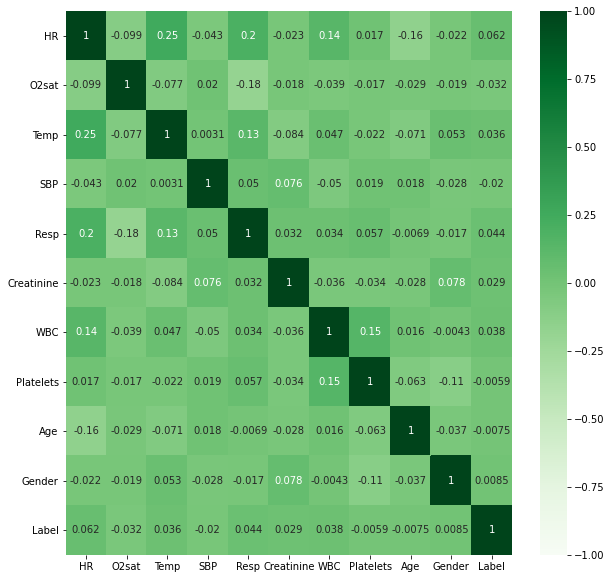

In [146]:
import seaborn as sb
plt.rcParams["figure.figsize"] = (10,10)
sb.heatmap(None_Data_Frame.corr(),
           annot = True,
           cmap = 'Greens',
           vmin = -1, vmax=1 ,
          )

In [147]:
select_data_value_0 = []
select_data_value_1 = []
_temp = []

for i, value1 in enumerate(non_data):
    _temp = []
    _temp = value1
    if _temp[-1] == 0:
        select_data_value_0.append(_temp)
    else :
        select_data_value_1.append(_temp)
        
select_data_value_0 = np.array(select_data_value_0)
select_data_value_1 = np.array(select_data_value_1)
    
    
            
print("일반 데이터 수 : ", select_data_value_0.shape, "패혈증 데이터 수 : ", select_data_value_1.shape)

일반 데이터 수 :  (26246, 11) 패혈증 데이터 수 :  (521, 11)


# 엑셀 출력용 페이지

In [97]:
test_data = []

for i, value1 in enumerate(select_data_value_1):
    test_temp = []
    test_temp = value1[-7:-1]
    count = 0
    for j, value2 in enumerate(test_temp):
        value3 = np.isnan(value2)
        if value3 == True:
            count += 1
        else :
            continue
    if count == 1:
        test_data.append(value1)

test_data = np.array(test_data)
print('shape : ', test_data.shape)

select_test_data_df = pd.DataFrame(test_data)
Sepsis_filepath = './Output/Sepsis_Sample_Data_v0.2.xlsx'
select_test_data_df.to_excel(Sepsis_filepath, index = False)

shape :  (369, 12)


In [91]:
select_data_value_1_df = pd.DataFrame(select_data_value_1)
Sepsis_filepath = './Output/Sepsis_Sample_Data_v0.1.xlsx'
select_data_value_1_df.to_excel(Sepsis_filepath, index = False)

In [148]:
select_data_value_0_df = pd.DataFrame(select_data_value_0)
select_data_value_0_df.rename(columns={0 : 'HR', 1 : 'O2sat', 2 : 'Temp', 3 : 'SBP', 4 : 'Resp', 5 : 'Creatinine', 
                                      6 : 'WBC', 7 : 'Platelets', 8 : 'Age', 9 : 'Gender', 10 : 'Label'}, inplace=True)
select_data_value_1_df = pd.DataFrame(select_data_value_1)
select_data_value_1_df.rename(columns={0 : 'HR', 1 : 'O2sat', 2 : 'Temp', 3 : 'SBP', 4 : 'Resp', 5 : 'Creatinine', 
                                      6 : 'WBC', 7 : 'Platelets', 8 : 'Age', 9 : 'Gender', 10 : 'Label'}, inplace=True)

# Normal_filepath = './Output/Normal_Sample_Data.xlsx'
# Sepsis_filepath = './Output/Sepsis_Sample_Data.xlsx'
# select_data_value_0_df.to_excel(Normal_filepath, index = False)
# select_data_value_1_df.to_excel(Sepsis_filepath, index = False)

In [149]:
select_data_value_0_df.head()

,HR,O2sat,Temp,SBP,Resp,Creatinine,WBC,Platelets,Age,Gender,Label
0,58.0,95.0,36.11,143.0,11.0,2.5,11.0,158.0,75.91,0.0,0.0
1,91.0,94.0,38.50,133.0,34.0,0.9,8.3,465.0,45.82,0.0,0.0
2,69.0,96.0,36.22,125.0,15.0,0.7,8.0,276.0,28.09,1.0,0.0
3,73.0,99.0,36.06,100.0,16.5,1.2,11.4,357.0,87.08,1.0,0.0
4,88.0,100.0,36.67,117.0,18.0,1.3,9.0,213.0,87.08,1.0,0.0


# 정상 데이터 상관 관계

<AxesSubplot:>

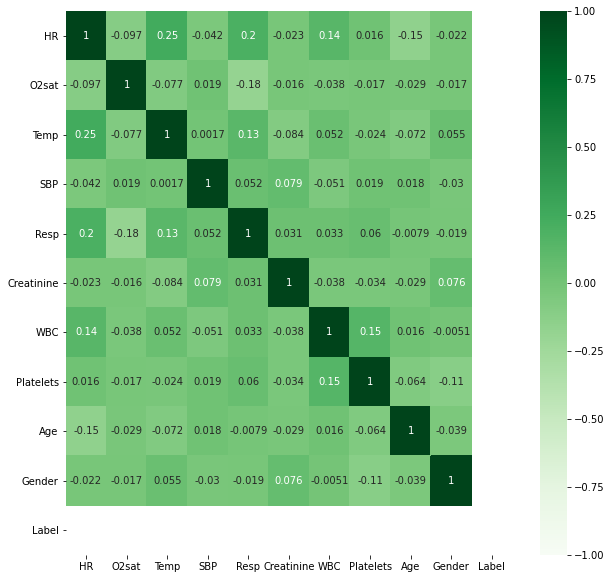

In [150]:
import seaborn as sb
plt.rcParams["figure.figsize"] = (10,10)
sb.heatmap(select_data_value_0_df.corr(),
           annot = True,
           cmap = 'Greens',
           vmin = -1, vmax=1 ,
          )

In [151]:
select_data_value_1_df.head()

,HR,O2sat,Temp,SBP,Resp,Creatinine,WBC,Platelets,Age,Gender,Label
0,97.0,100.0,36.50,115.0,12.5,0.5,9.6,414.0,63.59,0.0,1.0
1,84.0,86.0,38.44,117.0,31.0,0.5,9.1,211.0,77.56,1.0,1.0
2,103.0,100.0,37.30,99.0,26.0,6.9,5.3,64.0,50.63,1.0,1.0
3,106.0,100.0,37.89,119.0,17.5,0.8,13.6,131.0,42.95,1.0,1.0
4,63.0,98.0,37.67,120.5,16.0,0.7,11.7,156.0,57.92,1.0,1.0


# 패혈증 데이터 상관 관계

<AxesSubplot:>

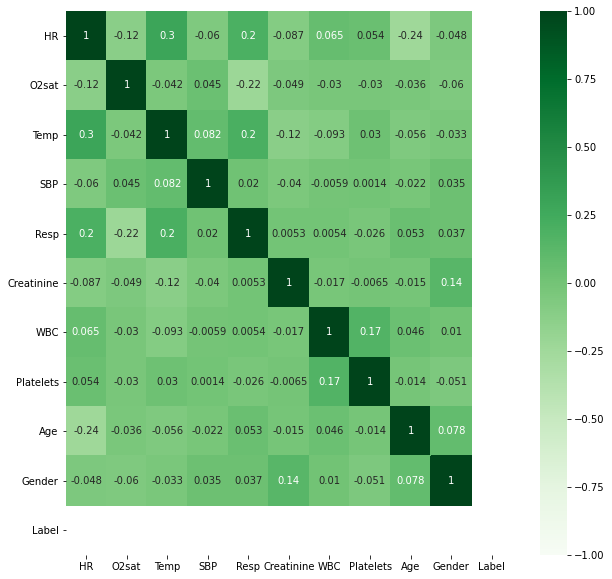

In [152]:
import seaborn as sb
plt.rcParams["figure.figsize"] = (10,10)
sb.heatmap(select_data_value_1_df.corr(),
           annot = True,
           cmap = 'Greens',
           vmin = -1, vmax=1 ,
          )

# 데이터 분포 확인

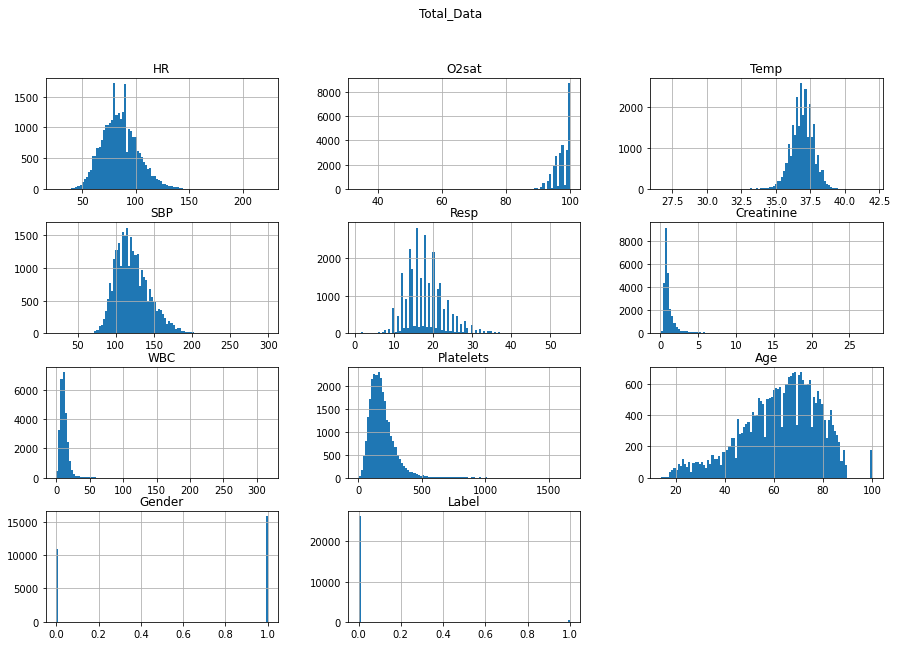

In [163]:
None_Data_Frame.hist(bins = 100, figsize = (15, 10))
plt.suptitle('Total_Data')
plt.show()

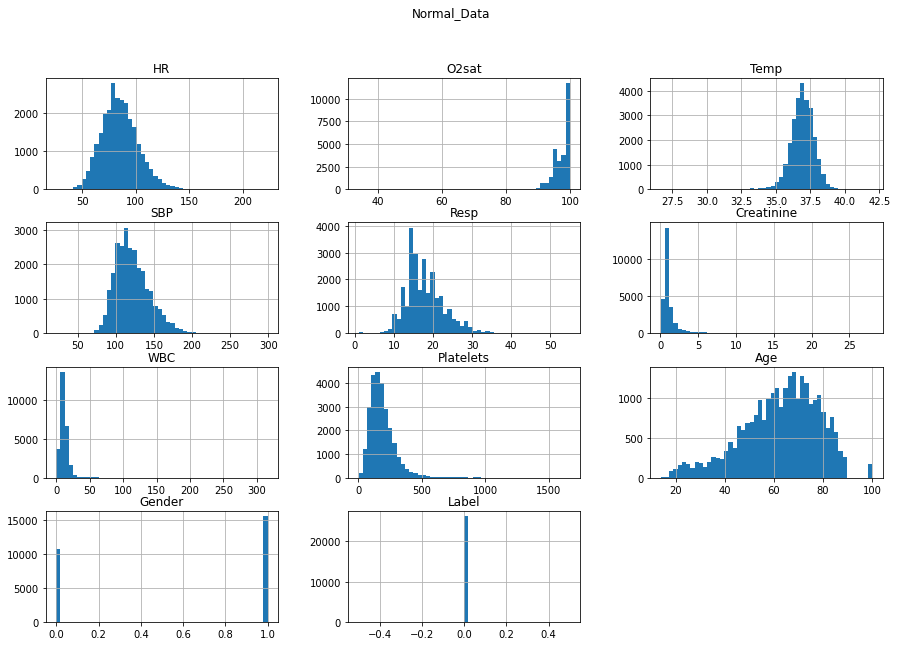

In [161]:
select_data_value_0_df.hist(bins = 50, figsize = (15, 10))
plt.suptitle('Normal_Data')
plt.show()

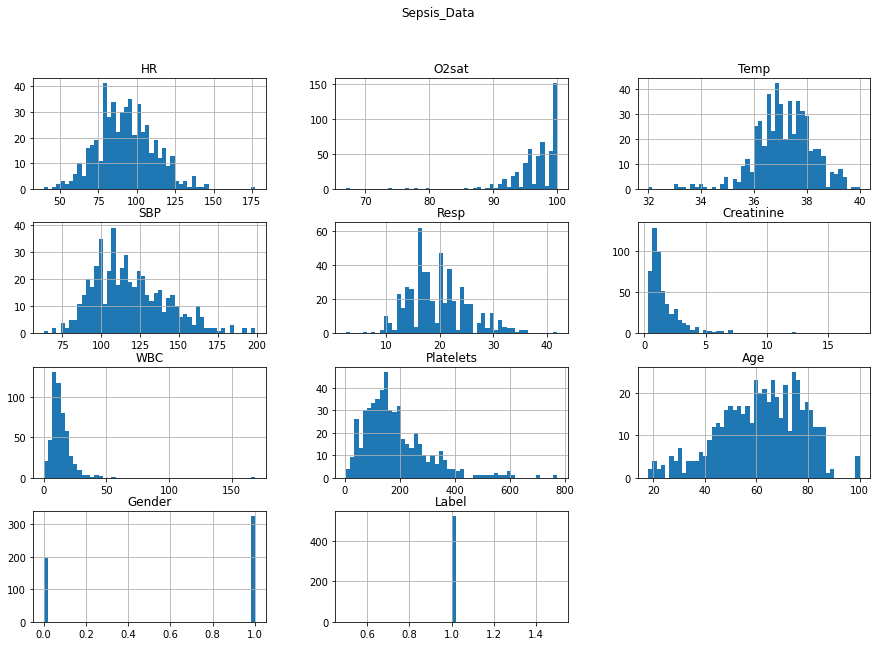

In [159]:
select_data_value_1_df.hist(bins = 50, figsize = (15, 10))
plt.suptitle('Sepsis_Data')
plt.show()

# 혈액정보 없는 데이터 조회

In [164]:
non_data.shape

(26767, 11)

In [181]:
check_3_none = []
for i,_folder_dir in enumerate (file_list):
    path = (folder_dir+'/'+_folder_dir)

    temp = []
    with open(path, 'r') as file:
        reader = csv.reader(file, delimiter='|')
        for checker, tmp in enumerate (reader):
            if checker == 0:
                continue
            else:
                tmp = np.float64(tmp)
                temp.append(tmp)
                
    temp = np.array(temp)

    # Factor / HR, O2sat, Temp, SBP, Resp, Age, Gender, WBC, Creatinine, Platelets, Fio2, Label
    temp_ = np.concatenate((temp[:,0], temp[:,1], temp[:,2], temp[:,3], temp[:,6],
                           temp[:,19], temp[:,31], temp[:,33], temp[:,34], temp[:,35], temp[:,40]), axis=0)
    
    temp_ = np.reshape(temp_,(temp.shape[0],11), order='F')
    
    for j,val1 in enumerate (temp_):
        count = 0
        for k,val2 in enumerate (val1):
            ## np.isnan 은 Nan을 찾으면 True를 리턴
            val3 = np.isnan(val2)
            if val3 == True:
                count += 1
            else:
                continue
        if count == 3:
            check_3_none.append(temp_[j])

        
check_3_none = np.array(check_3_none)
print('check_3_none_shape :',check_3_none.shape)

check_3_none_shape : (446276, 11)


In [182]:
check_value = []

for i, value1 in enumerate(check_3_none):
    count = 0
    check_temp_ = value1[5:8]
    for j, value2 in enumerate(check_temp_):
        value3 = np.isnan(value2)
        if value3 == True:
            count += 1
        else :
            continue
    if count == 3:
        check_value.append(value1)
        
check_value = np.array(check_value)
print('check_value_shape : ', check_value.shape)

check_value_shape :  (428855, 11)


In [183]:
check_value[0]

array([108.  ,  92.  ,  36.11, 123.  ,  29.  ,    nan,    nan,    nan,
        83.14,   0.  ,   0.  ])

# 데이터 수 체크

In [187]:
_select_data_value_0 = []
_select_data_value_1 = []

for i, value1 in enumerate(check_value):
    _temp_ = []
    _temp_ = value1
    if _temp_[-1] == 0:
        _select_data_value_0.append(value1)
    else :
        _select_data_value_1.append(value1)
        
_select_data_value_0 = np.array(_select_data_value_0)
_select_data_value_1 = np.array(_select_data_value_1)
    
    
            
print("일반 데이터 수 : ", _select_data_value_0.shape, "패혈증 데이터 수 : ", _select_data_value_1.shape)

일반 데이터 수 :  (421672, 11) 패혈증 데이터 수 :  (7183, 11)


In [188]:
_select_data_value_0[0]

array([108.  ,  92.  ,  36.11, 123.  ,  29.  ,    nan,    nan,    nan,
        83.14,   0.  ,   0.  ])

In [190]:
_select_data_value_0_df = pd.DataFrame(_select_data_value_0)
_select_data_value_0_df.rename(columns={0 : 'HR', 1 : 'O2sat', 2 : 'Temp', 3 : 'SBP', 4 : 'Resp', 5 : 'Creatinine', 
                                      6 : 'WBC', 7 : 'Platelets', 8 : 'Age', 9 : 'Gender', 10 : 'Label'}, inplace=True)

_select_data_value_0_df.head()

,HR,O2sat,Temp,SBP,Resp,Creatinine,WBC,Platelets,Age,Gender,Label
0,108.0,92.0,36.11,123.0,29.0,NaN,NaN,NaN,83.14,0.0,0.0
1,104.0,92.0,37.17,138.0,19.0,NaN,NaN,NaN,83.14,0.0,0.0
2,109.0,91.0,36.56,132.0,24.0,NaN,NaN,NaN,83.14,0.0,0.0
3,109.0,91.0,37.11,147.0,22.0,NaN,NaN,NaN,83.14,0.0,0.0
4,102.0,89.0,36.67,132.0,32.0,NaN,NaN,NaN,83.14,0.0,0.0


In [189]:
_select_data_value_1[0]

array([119.  , 100.  ,  37.94, 140.  ,  26.5 ,    nan,    nan,    nan,
        27.92,   1.  ,   1.  ])

In [191]:
_select_data_value_1_df = pd.DataFrame(_select_data_value_1)
_select_data_value_1_df.rename(columns={0 : 'HR', 1 : 'O2sat', 2 : 'Temp', 3 : 'SBP', 4 : 'Resp', 5 : 'Creatinine', 
                                      6 : 'WBC', 7 : 'Platelets', 8 : 'Age', 9 : 'Gender', 10 : 'Label'}, inplace=True)

_select_data_value_1_df.head()

,HR,O2sat,Temp,SBP,Resp,Creatinine,WBC,Platelets,Age,Gender,Label
0,119.0,100.0,37.94,140.0,26.5,NaN,NaN,NaN,27.92,1.0,1.0
1,111.0,97.0,37.39,136.0,26.0,NaN,NaN,NaN,27.92,1.0,1.0
2,116.0,96.0,37.72,143.0,30.0,NaN,NaN,NaN,27.92,1.0,1.0
3,90.0,100.0,37.17,140.0,18.0,NaN,NaN,NaN,65.79,1.0,1.0
4,101.0,93.0,37.78,108.0,21.0,NaN,NaN,NaN,39.28,1.0,1.0
